In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
# plt.rc('xtick', labelsize=8)
# plt.rc('ytick', labelsize=8)
# plt.rc('axes', labelsize=8)

import sys
import pathlib

# in jupyter (lab / notebook), based on notebook path
module_path = str(pathlib.Path.cwd().parents[0] / "py")
# # in standard python
# module_path = str(pathlib.Path.cwd(__file__).parents[0] / "common")

if module_path not in sys.path:
    sys.path.append(module_path)

import common.viz

In [2]:
# Compare between experiments in a list
experiment_list = [
    "sense_t24_random-agent_BC_rsp10",
    "sense_t24_random-agent_BC_rsp70",
                    ]
# human readable names for experiments
label_list = [
    "BC_rsp10",
    "BC_rsp70",
                ]

# metrics to compare
metric_list = [
    # "reward_rec",
    # "ep_done_rec",
    # "action_log",
    "sense_dc_log",
    # "henergy",
    # "penergy",
    "benergy",
    # "menergy",
    # "req_obs",
    # "sense_reward_log",
    # "enp_reward_log",
            ]

# Indicate which seed instance to use
seed_list = [20211229]
seed_no = seed_list[0]

# Set mode to train or test
mode = "test"
print(mode)

# other arguments
location = "tokyo"
year = 1995
timeslots_per_day = 24
START_DAY = 43
NO_OF_DAY_TO_PLOT = 5

test


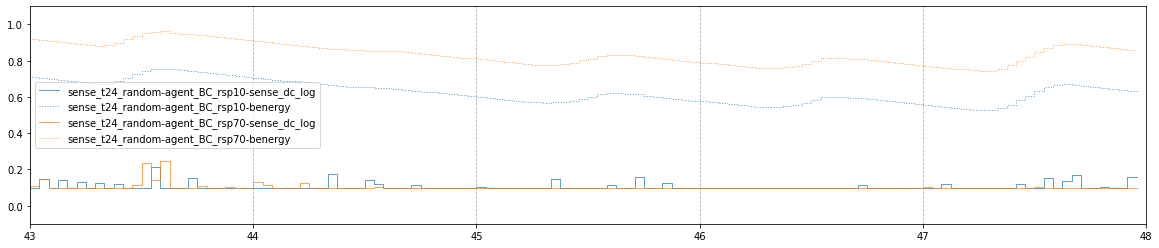

In [3]:
root_folder = os.path.dirname(os.getcwd())
results_folder = os.path.join(root_folder,"results")

common.viz.compare_trace(results_folder,
                         experiment_list,
                          label_list,
                          metric_list,
                          seed_no,
                          mode,
                          location,
                          year,
                          timeslots_per_day,
                          START_DAY,
                          NO_OF_DAY_TO_PLOT)